In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading the Labeled Dataset

In [2]:
df_offensive = pd.read_csv('labeled_data.csv')

In [3]:
df_offensive.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
df_offensive.sample(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
18761,19177,3,0,3,0,1,RT @chrisbegettinit: &#8220;@_100D: It's like ...
3586,3682,3,0,0,3,2,@J_Logan And you know best about the bird move...
18946,19365,3,0,3,0,1,RT @easy_edd: lifes a bitch
3922,4038,3,0,3,0,1,@LilKev_J pussy
9462,9722,3,0,0,3,2,God made male and female blades of grass. Ever...


In [5]:
df_offensive.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [6]:
df_offensive = df_offensive.drop(labels = range(6000,24783), axis = 0)

In [7]:
df_offensive

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
5995,1,@gallinofmilk fight me hoe
5996,1,@garcialaura_ haha ya hit that hoe right there
5997,1,"@garcialaura_ lol my bad, I forgot that hoe ma..."
5998,1,@garcialaura_ rt! You'll see watch he finna hi...


#### Labels
0 --> Hate speech 
1 --> Offensive language
2 --> Neither

In [8]:
df_offensive['class'].unique()

array([2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='class', ylabel='count'>

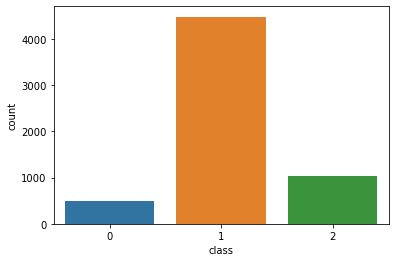

In [9]:
sns.countplot(x='class', data=df_offensive)

In [10]:
df_offensive[df_offensive['class']==0]['class']=1

<ipython-input-10-ecec8f69341f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_offensive[df_offensive['class']==0]['class']=1


In [11]:
df_offensive["class"].replace({0: 1}, inplace=True)

In [12]:
df_offensive['class'].unique()

array([2, 1], dtype=int64)

<AxesSubplot:xlabel='class', ylabel='count'>

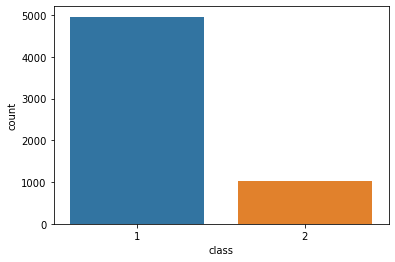

In [13]:
sns.countplot(x='class',data=df_offensive)

In [14]:
df_offensive["class"].replace({2: 0}, inplace=True)

<AxesSubplot:xlabel='class', ylabel='count'>

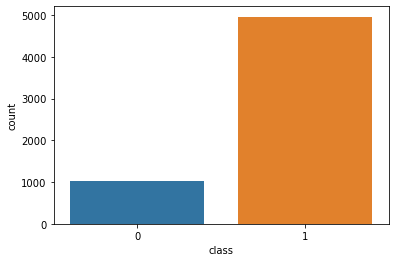

In [15]:
sns.countplot(x='class',data=df_offensive)

In [16]:
df_offensive.rename(columns ={'class':'label'}, inplace = True)

In [17]:
df_offensive.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


<AxesSubplot:xlabel='label', ylabel='count'>

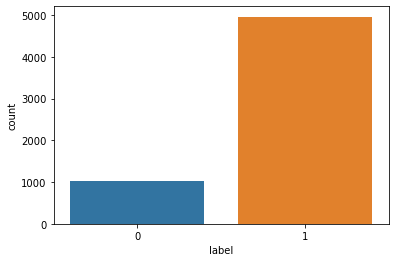

In [18]:
sns.countplot(x="label", data=df_offensive)

#### Reading the Train data


In [19]:
df_twitter = pd.read_csv('train.csv')

In [20]:
df_twitter.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [21]:
df_twitter.drop('id',axis=1,inplace=True)

In [22]:
df_twitter = df_twitter.drop(labels = range(6000,31962))

In [23]:
df_twitter

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
5995,0,@user #semenbulletdrop #airraid after #manstr...
5996,0,working on some new stuff for you all today :)...
5997,0,@user im not gonna lie i did think angela was...
5998,0,great class tonight!! ð #dancing #class #...


<AxesSubplot:xlabel='label', ylabel='count'>

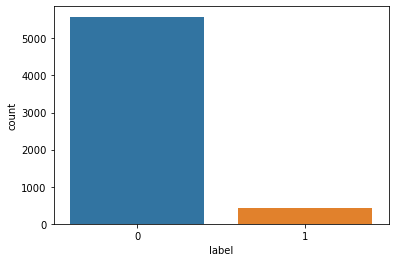

In [24]:
sns.countplot(x='label', data=df_twitter)

In [25]:
#twitter has train dataset
#offensive has labeled data
frame=[df_twitter,df_offensive]
df = pd.concat(frame)

In [26]:
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
5995,1,@gallinofmilk fight me hoe
5996,1,@garcialaura_ haha ya hit that hoe right there
5997,1,"@garcialaura_ lol my bad, I forgot that hoe ma..."
5998,1,@garcialaura_ rt! You'll see watch he finna hi...


<AxesSubplot:xlabel='label', ylabel='count'>

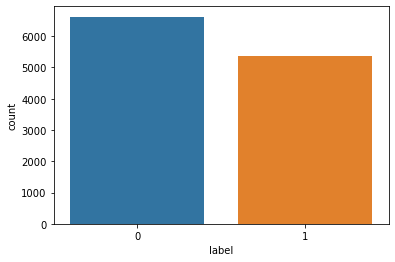

In [27]:
sns.countplot(x='label', data=df)

In [28]:
df.shape

(12000, 2)

In [29]:
df.sample(5)

,label,tweet
2758,0,*works at marylous for 2 years*
5507,0,"@almuirSI Probably, yeah. By most accounts, he..."
5178,1,@WyattNuckels insecure much put all you insult...
1835,1,&#8220;@leynachristina: I'm driving myself ins...
1728,0,&#8220;@coltscommunity @Pacers @nflcolts @indy...


In [30]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

In [31]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [32]:
df['tweet']=df['tweet'].apply(clean_text)

In [33]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text2(text):

    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)  
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text
df['tweet'] = df['tweet'].apply(clean_text2)

In [34]:
df.head()

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunct...
1,0,user user thank lyft credit cant use caus dont...
2,0,bihday majesti
3,0,model love u take u time ur
4,0,factsguid societi motiv


#### Machine Learning

1. Train Test Split

In [35]:
x=df['tweet']
y=df['label']

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

9000 9000
3000 3000


2. Feature Extraction

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english', ngram_range=(1,5))
x_train_vectorizer=count.fit_transform(x_train)

In [38]:
x_test_vectorizer=count.transform(x_test)
x_train_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Classification Algorithms implementation

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [40]:
model_vectorizer= MultinomialNB().fit(x_train_vectorizer, y_train)
prediction_vectorizer=model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,prediction_vectorizer))
print (classification_report(y_test, prediction_vectorizer))

[[1542  166]
 [  91 1201]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1708
           1       0.88      0.93      0.90      1292

    accuracy                           0.91      3000
   macro avg       0.91      0.92      0.91      3000
weighted avg       0.92      0.91      0.91      3000



In [41]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc' )


In [42]:
xgb_model_vectorizer = xgb_model.fit(x_train_vectorizer, y_train)
xgb_predictions_vectorizer=xgb_model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,xgb_predictions_vectorizer))
print (classification_report(y_test, xgb_predictions_vectorizer))


[[1674   34]
 [ 200 1092]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1708
           1       0.97      0.85      0.90      1292

    accuracy                           0.92      3000
   macro avg       0.93      0.91      0.92      3000
weighted avg       0.93      0.92      0.92      3000



In [43]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train_vectorizer, y_train)
lr_model_predict = lr_model.predict(x_test_vectorizer)
print(confusion_matrix(y_test,lr_model_predict))
print(classification_report(y_test, lr_model_predict))

[[1660   48]
 [ 169 1123]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1708
           1       0.96      0.87      0.91      1292

    accuracy                           0.93      3000
   macro avg       0.93      0.92      0.93      3000
weighted avg       0.93      0.93      0.93      3000



In [44]:
from sklearn.svm import SVC
svc_class = SVC(kernel ='linear', random_state = 0)
svc_class.fit(x_train_vectorizer, y_train)
svc_class_predict = svc_class.predict(x_test_vectorizer)
print(confusion_matrix(y_test,svc_class_predict))
print(classification_report(y_test, svc_class_predict))

[[1638   70]
 [ 165 1127]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1708
           1       0.94      0.87      0.91      1292

    accuracy                           0.92      3000
   macro avg       0.93      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [45]:
from sklearn.tree import DecisionTreeClassifier
dtree_class = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtree_class.fit(x_train_vectorizer, y_train)
dtree_pred = dtree_class.predict(x_test_vectorizer)
print(confusion_matrix(y_test, dtree_pred))
print(classification_report(y_test, dtree_pred))

[[1595  113]
 [ 133 1159]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1708
           1       0.91      0.90      0.90      1292

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [46]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1, random_state=101, 
                             max_features=None, min_samples_leaf= 40)
rfm.fit(x_train_vectorizer, y_train)
rfm_pred = rfm.predict(x_test_vectorizer)
print(confusion_matrix(y_test, rfm_pred))
print(classification_report(y_test, rfm_pred))

[[1680   28]
 [ 270 1022]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1708
           1       0.97      0.79      0.87      1292

    accuracy                           0.90      3000
   macro avg       0.92      0.89      0.90      3000
weighted avg       0.91      0.90      0.90      3000



In [47]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential


In [48]:
max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [49]:
model = Sequential()
model.add(Embedding(max_words, 200, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 200)          10000000  
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 200)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               120400    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,120,501
Trainable params: 10,120,501
Non-trainable params: 0
_________________________________________________________________


In [50]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=10
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [51]:
history=model.fit(sequences_matrix,y_train,batch_size=1200 , epochs=10,
          validation_split=0.2,callbacks=[stop,checkpoint])

Epoch 1/10
6/6 [==============================] - 105s 15s/step - loss: 0.6603 - accuracy: 0.6218 - val_loss: 0.5960 - val_accuracy: 0.8061
Epoch 2/10
6/6 [==============================] - 111s 19s/step - loss: 0.5093 - accuracy: 0.8367 - val_loss: 0.4433 - val_accuracy: 0.8611
Epoch 3/10
6/6 [==============================] - 127s 22s/step - loss: 0.3354 - accuracy: 0.9219 - val_loss: 0.3375 - val_accuracy: 0.8828
Epoch 4/10
6/6 [==============================] - 139s 24s/step - loss: 0.2412 - accuracy: 0.9365 - val_loss: 0.3099 - val_accuracy: 0.8994
Epoch 5/10
6/6 [==============================] - 174s 30s/step - loss: 0.1952 - accuracy: 0.9569 - val_loss: 0.2708 - val_accuracy: 0.9006
Epoch 6/10
6/6 [==============================] - 185s 31s/step - loss: 0.1475 - accuracy: 0.9667 - val_loss: 0.2507 - val_accuracy: 0.9039
Epoch 7/10
6/6 [==============================] - 215s 37s/step - loss: 0.1167 - accuracy: 0.9715 - val_loss: 0.2371 - val_accuracy: 0.9139
Epoch 8/10
6/6 [====

In [52]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [53]:
accr = model.evaluate(test_sequences_matrix,y_test)


94/94 [==============================] - 18s 192ms/step - loss: 0.2414 - accuracy: 0.9123


In [54]:
lstm_prediction=model.predict(test_sequences_matrix)


In [55]:
res=[]
for prediction in lstm_prediction:
    if prediction[0]<0.5:
        res.append(0)
    else:
        res.append(1)

In [56]:
print(confusion_matrix(y_test,res))


[[1580  128]
 [ 135 1157]]


In [57]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [58]:
model.save("NegativeSentiments.h5")

In [59]:
import keras

In [60]:
load_model=keras.models.load_model("./NegativeSentiments.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [63]:
text_input = input("Please enter your tweet: ")


Please enter your tweet: I like food


In [66]:
def myfunc(a):
    test=[clean_text2(text_input)]
    print(test)
    seq = load_tokenizer.texts_to_sequences(test)
    padded = sequence.pad_sequences(seq, maxlen=300)
    print(seq)
    pred = load_model.predict(padded)
    print("pred", pred)
    if pred<0.5:
        print("no hate")
    else:
        print("hate and abusive")
myfunc(text_input)

['hate want dead']
[[65, 22, 403]]
pred [[0.41791838]]
no hate


In [65]:
text_input = input("Please enter your tweet: ")


Please enter your tweet: I hate you and want you dead you
